# MAT281 - Laboratorio N°06



## Problema 01
<img src="./images/logo_iris.jpg" width="360" height="360" align="center"/>

El **Iris dataset** es un conjunto de datos que contine una  muestras de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Se midió cuatro rasgos de cada muestra: el largo y ancho del sépalo y pétalo, en centímetros.

Lo primero es cargar el conjunto de datos y ver las primeras filas que lo componen:

In [1]:
# librerias

import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', 500)  # Ver más columnas de los dataframes


# Ver gráficos de matplotlib en jupyter notebook/lab
%matplotlib inline

In [2]:
# cargar datos
df = pd.read_csv(os.path.join("data","iris_contaminados.csv"))
df.columns = ['sepalLength',
                  'sepalWidth',
                  'petalLength',
                  'petalWidth',
                  'species']

df.head() 

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,4.4,3.2,1.3,3.0,setosa
1,7.2,3.6,6.1,2.5,virginica
2,6.3,3.3,6.0,2.5,VIRGINICA
3,6.7,3.3,5.7,2.5,virginica
4,6.3,3.4,5.6,2.4,virginica


### Bases del experimento

Lo primero es identificar las variables que influyen en el estudio y la naturaleza de esta.

* **species**: 
    * Descripción: Nombre de la especie de Iris. 
    * Tipo de dato: *string*
    * Limitantes: solo existen tres tipos (setosa, virginia y versicolor).
* **sepalLength**: 
    * Descripción: largo del sépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 4.0 y 7.0 cm.
* **sepalWidth**: 
    * Descripción: ancho del sépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 2.0 y 4.5 cm.
* **petalLength**: 
    * Descripción: largo del pétalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 1.0 y 7.0 cm.
* **petalWidth**: 
    * Descripción: ancho del pépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 0.1 y 2.5 cm.

Su objetivo es realizar un correcto **E.D.A.**, para esto debe seguir las siguientes intrucciones:

1. Realizar un conteo de elementos de la columna **species** y corregir según su criterio. Reemplace por "default" los valores nan..

In [3]:
df['species'].unique()

array(['setosa', ' virginica', 'VIRGINICA', 'virginica', 'virginica ',
       'versicolor', 'Versicolor', 'VERSICOLOR', nan, 'Setosa', 'SETOSA'],
      dtype=object)

In [4]:
#Pasaremos las mayúsculas a minusculas y sacaremos los espacios 
df['species']= df['species'].str.lower().str.strip()

df['species'].unique()

array(['setosa', 'virginica', 'versicolor', nan], dtype=object)

In [5]:
#Reemplazaremos los valores nan por "default"

df.loc[df['species'].isnull(),'species']='default'

df['species'].unique()

array(['setosa', 'virginica', 'versicolor', 'default'], dtype=object)

2. Realizar un gráfico de box-plot sobre el largo y ancho de los petalos y sépalos. Reemplace por **0** los valores nan.

Text(0.5, 0, 'specie')

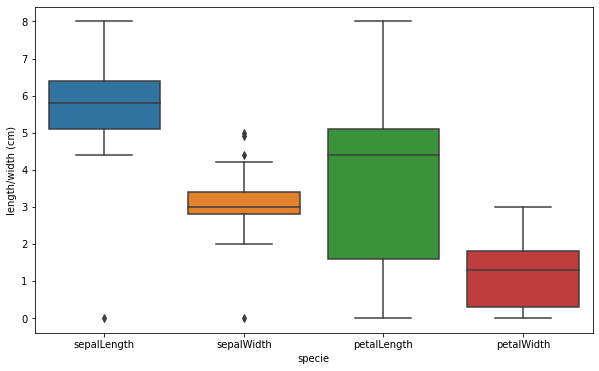

In [6]:
for col in df.columns:
    df.loc[df[col].isnull(),col]=0

stats_df = df.drop(['species'], axis=1) #sacamos la etiqueta species

plt.figure(figsize = (10,6))       #tamaño del gráfico
sns.boxplot(data=stats_df)         #grafico de box-plot 
plt.ylabel('length/width (cm)')
plt.xlabel('specie')

3. Anteriormente se define un rango de valores válidos para los valores del largo y ancho de los petalos y sépalos. Agregue una columna denominada **label**  que identifique cuál de estos valores esta fuera del rango de valores válidos.

In [7]:
#Rango de valores validos para LARGO pétalo: largo_inf_petalo, largo_sup_petalo
#Rango de valores validos para ANCHO pétalo: ancho_inf_petalo, ancho_sup_petalo
#Rango de valores validos para LARGO sépalo: largo_inf_sepalo, largo_sup_sepalo
#Rango de valores validos para ANCHO sépalo: ancho_inf_sepalo, ancho_sup_sepalo


largo_inf_petalo =  df['petalLength']>=1.0                    
largo_sup_petalo =  df['petalLength']<=7.0                  

largo_petalo = largo_inf_petalo & largo_sup_petalo


ancho_inf_petalo =  df['petalWidth']>=0.1                    
ancho_sup_petalo =  df['petalWidth']<=2.5                   

ancho_petalo = ancho_inf_petalo & ancho_sup_petalo


largo_inf_sepalo =  df['sepalLength']>=4.0                    
largo_sup_sepalo =  df['sepalLength']<=7.0                    

largo_sepalo = largo_inf_sepalo & largo_sup_sepalo


ancho_inf_sepalo =  df['sepalWidth']>=2.0                   
ancho_sup_sepalo =  df['sepalWidth']<=4.5                  

ancho_sepalo = ancho_inf_sepalo & ancho_sup_sepalo


df["label"] = largo_petalo & ancho_petalo & largo_sepalo & ancho_sepalo
df

,sepalLength,sepalWidth,petalLength,petalWidth,species,label
0,4.4,3.2,1.3,3.0,setosa,False
1,7.2,3.6,6.1,2.5,virginica,False
2,6.3,3.3,6.0,2.5,virginica,True
3,6.7,3.3,5.7,2.5,virginica,True
4,6.3,3.4,5.6,2.4,virginica,True
...,...,...,...,...,...,...
145,5.3,3.0,1.1,0.1,setosa,True
146,4.8,3.0,1.4,0.1,setosa,True
147,4.9,3.1,1.5,0.1,setosa,True
148,4.9,3.6,1.4,0.1,setosa,True


4. Realice un gráfico de *sepalLength* vs *petalLength* y otro de *sepalWidth* vs *petalWidth* categorizados por la etiqueta **label**. Concluya sus resultados.

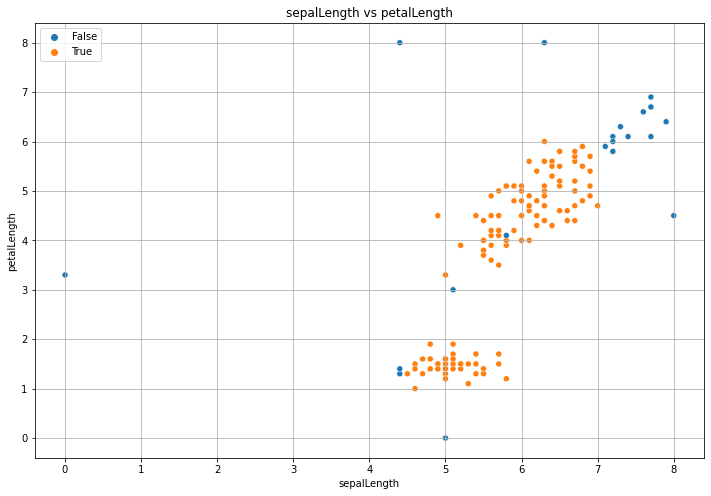

In [8]:
# Grafico de sepalLength vs petalLength

plt.figure(figsize=(12, 8))

sns.scatterplot(
    data = df, 
    x = 'sepalLength',  
    y = 'petalLength', 
    hue = 'label',
)

plt.grid(True)
plt.title("sepalLength vs petalLength")
plt.legend(loc='upper left')
plt.show()

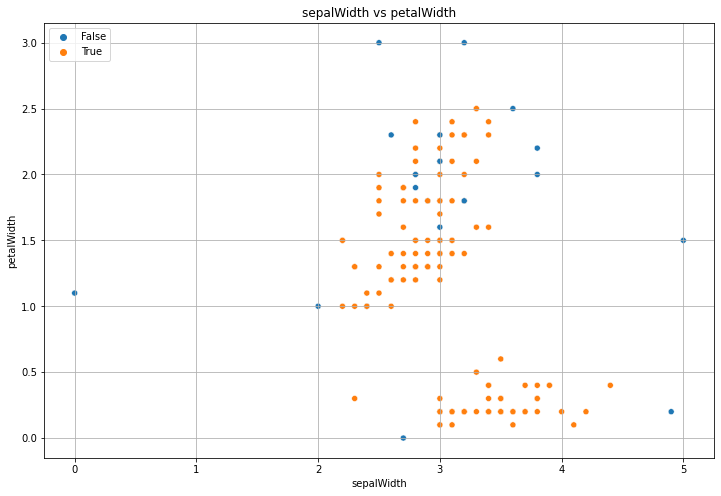

In [9]:
# Grafico de sepalWidth vs petalWidth

plt.figure(figsize=(12, 8))

sns.scatterplot(
    data = df,  
    x = 'sepalWidth', 
    y = 'petalWidth', 
    hue = 'label' 
)

plt.grid(True)
plt.title("sepalWidth vs petalWidth")
plt.legend(loc='upper left')
plt.show()

5. Filtre los datos válidos y realice un gráfico de *sepalLength* vs *petalLength* categorizados por la etiqueta **species**.

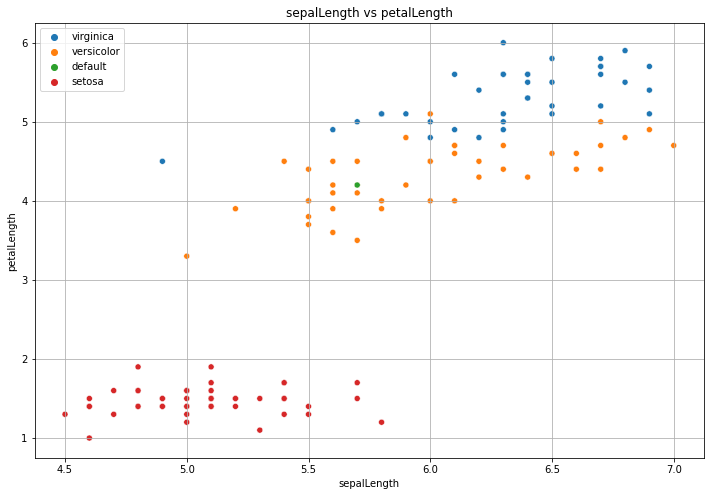

In [10]:
# Grafico de sepalLength vs petalLength

plt.figure(figsize=(12, 8))

sns.scatterplot(
    data = df.loc[df['label']==True],   #solo los datos validos
    x = 'sepalLength', 
    y = 'petalLength', 
    hue = 'species' 
)

plt.grid(True)
plt.title("sepalLength vs petalLength")
plt.legend(loc='upper left')
plt.show()